# Problema

Predecir el coste del seguro

## Instrucciones

 Utilizar el dataset (insurance.csv) para entrenar un modelo de regresión capaz de predecir el valor del seguro en función de las características del cliente. Realizar limpieza, preprocesado modelado y testeo del modelo aportando conclusiones de todos estos pasos.

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [41]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [42]:
ruta = "/content/insurance.csv"
data = pd.read_csv(ruta)

In [43]:
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos

* Valorar diferentes modelos de regresión

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

## Implementación

#LIMPIEZA

In [44]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010




*   age minima 18 años y maxima 64 años
*   bmi minimo 15.960000 y maximo 53.130000
*   children minimo 0 maximo 5
*   charges minimo 1121.873900 y maximo 63770.428010





In [45]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Tenemos variables categoricas como sex, smoker y region.
Variables numericas como age, bmi, children, charges

In [47]:
import pandas as pd

# Suponiendo que 'data' es tu DataFrame
hay_duplicados = data.duplicated().any()

if hay_duplicados:
    print("Hay filas duplicadas en el DataFrame.")
else:
    print("No hay filas duplicadas en el DataFrame.")


Hay filas duplicadas en el DataFrame.


In [48]:
import pandas as pd

# Suponiendo que 'data' es tu DataFrame
data_sin_duplicados = data.drop_duplicates()

# Ahora 'data_sin_duplicados' contiene el DataFrame original sin filas duplicadas
data_sin_duplicados

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [49]:
data_sin_duplicados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No tenemos nulos

#ANALISIS EXPLORATORIO

<ipython-input-50-1f5aa069baff>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_sin_duplicados['charges'], kde = True, color = 'c')


Text(0.5, 1.0, 'Distribucion de Charges')

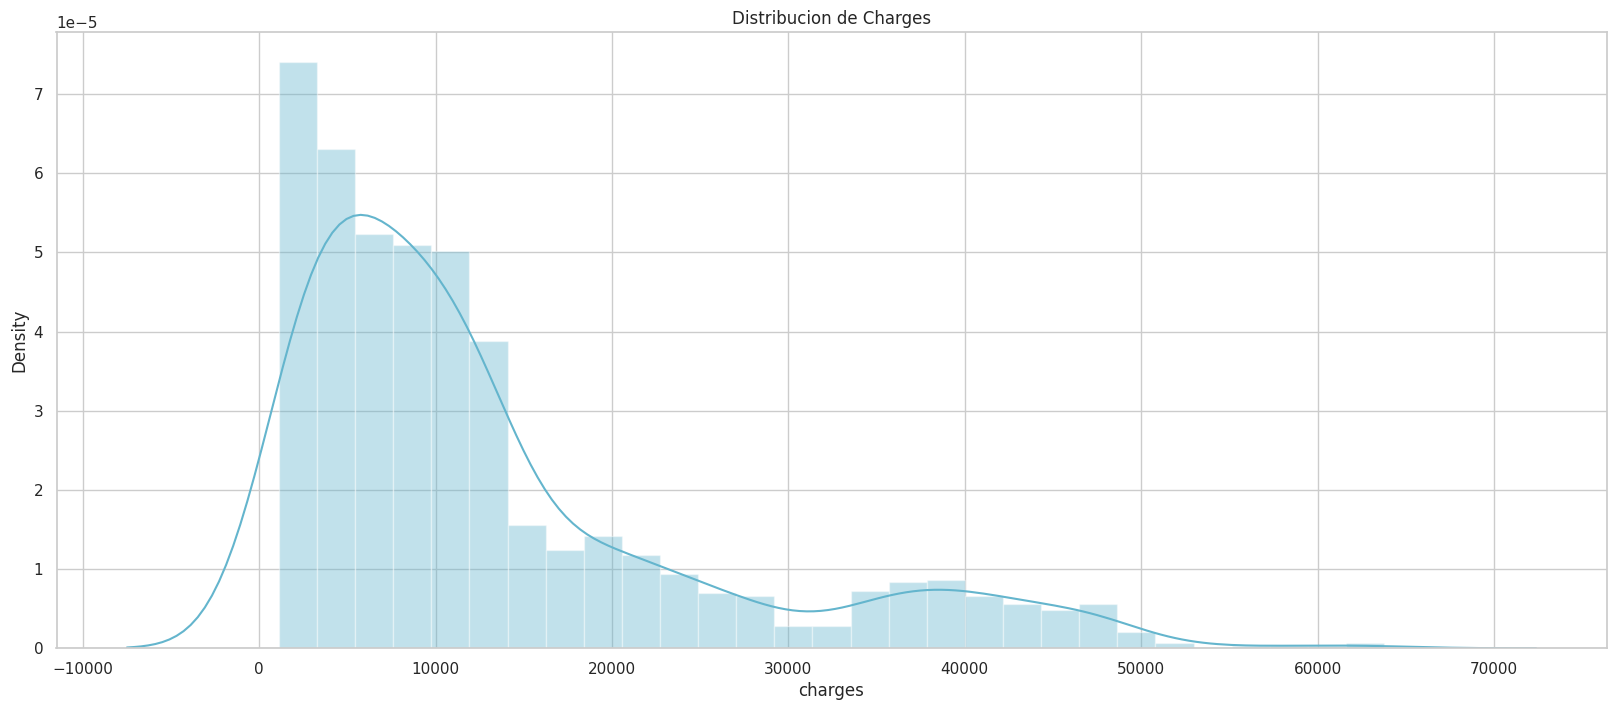

In [50]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(20,8))
ax = sns.distplot(data_sin_duplicados['charges'], kde = True, color = 'c')
plt.title('Distribucion de Charges')

El grafico de densidad de charges nos muestra que esta un poco sesgada hacia la derecha, para poder observar reducir el sesgo a una distribución más normal vamos a utilizar el logaritmo natural.

<ipython-input-51-cb575797d576>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log10(data_sin_duplicados['charges']), kde = True, color = 'r')


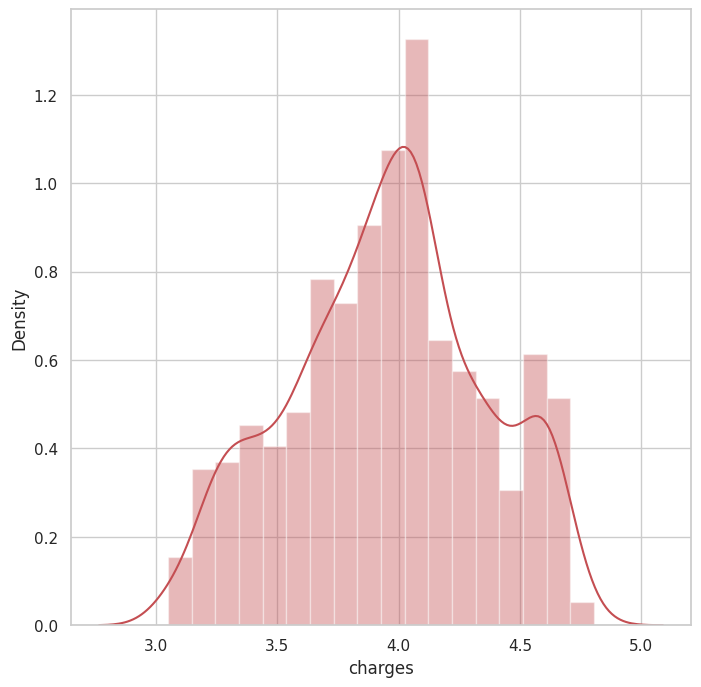

In [51]:
f, ax = plt.subplots(1,1, figsize= (8,8))
ax = sns.distplot(np.log10(data_sin_duplicados['charges']), kde = True, color = 'r')

Charges por region, se puede observar que en southeast tienen un costo de seguro mas alto.

<ipython-input-52-9501537e6fa0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=charges.values, y=charges.index, palette='Blues', ax=ax)


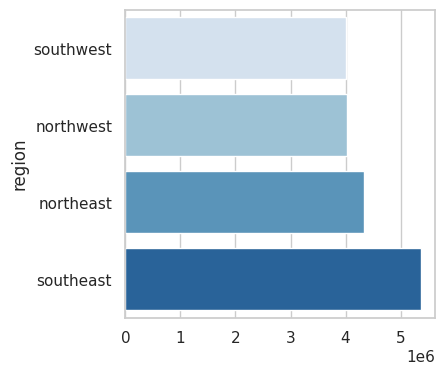

In [52]:
charges = data_sin_duplicados.groupby('region')['charges'].sum().sort_values(ascending=True)

f, ax = plt.subplots(1, 1, figsize=(4, 4))
sns.barplot(x=charges.values, y=charges.index, palette='Blues', ax=ax)
plt.show()


Charges por region y sexo, se puede observar que los hombres generalmente en cada region tienen un costo mas alto. Solo en northwest es parecido hombre y mujer. Sin embargo, los que mas pagan son los hombres en southeast.

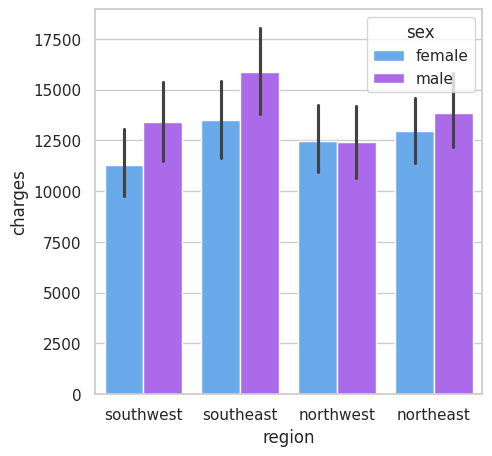

In [53]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.barplot(x='region', y='charges', hue='sex', data=data_sin_duplicados, palette='cool')
plt.show()

Charges por region y fumador, se puede decir que los que fuman tienen un costo mayor significativamente en todas las regiones.

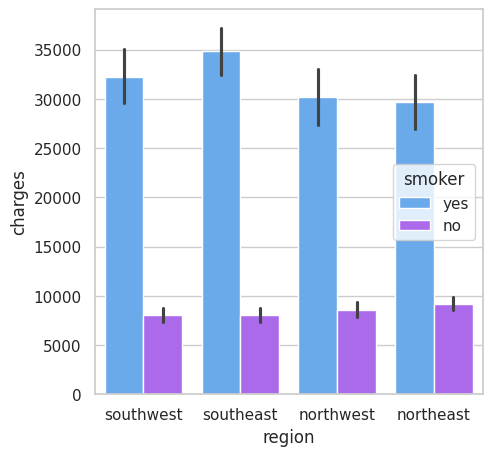

In [54]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.barplot(x='region', y='charges', hue='smoker', data=data_sin_duplicados, palette='cool')
plt.show()

Charges por region e hijos, se puede observar que:

*   Southwest: mayor costo por 2 hijos
*   Southeast: mayor costo por 3 hijos
*   Northwest: mayor costo por 3 hijos
*   Northeast: mayor costo por 1 hijo





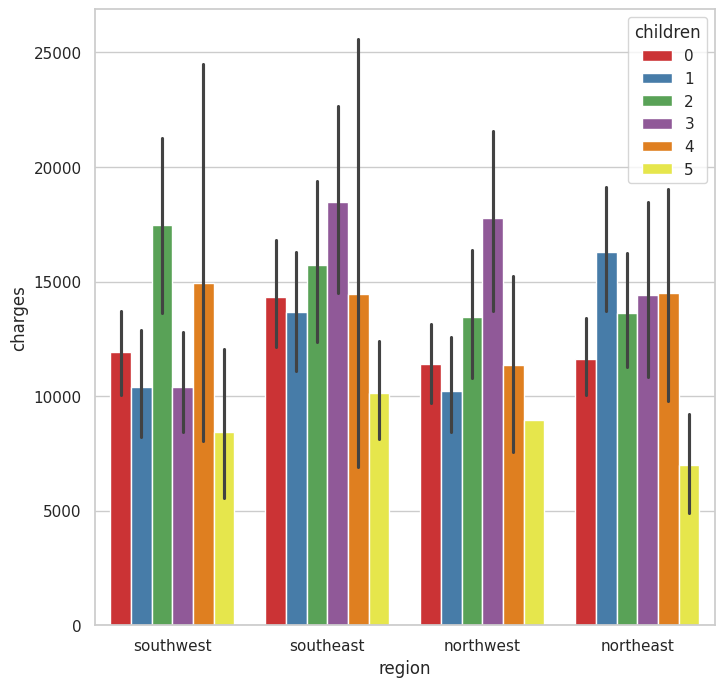

In [55]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.barplot(x='region', y='charges', hue='children', data=data_sin_duplicados, palette='Set1')
plt.show()

*   Los costos mas altos por fumar se encuentran en
southeast y los mas bajos en northeast.
*   Las personas con hijos entre 1 y 3 son los que mas pagan.
*   Las personas en southeast tienen un costo mas elevado que en otras regiones.






Charges por age y bmi, y ninos segun si fuman o no

*   Age: a menor edad, menor costo. Por no fumador igualmente menor edad menor costo, mas edad va subiendo el costo. Sin embargo, para los fumadores mas alto el rango de costos, igualmente mientras mas joven fumador menor costo, y mientras mas edad mayor costo.
*   Bmi: las personas que no fuman en bmi se puede observar que el costo es practicamente constante durante los años. Sin embargo, para los fumadores, se puede observar que el indice de masa corporal a menos edad menos bmi y el costo es menor, pero a mayor edad va creciendo significativamente bmi y el costo.



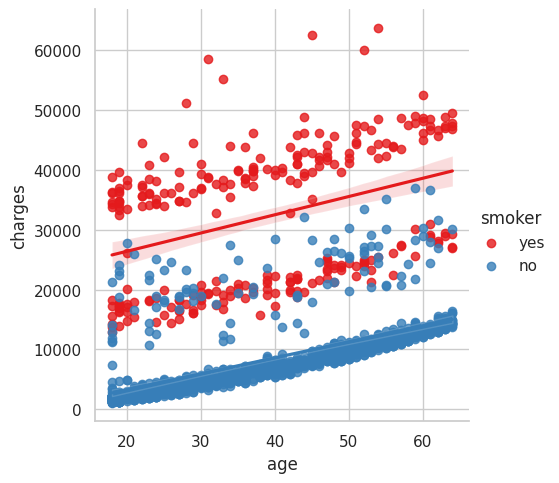

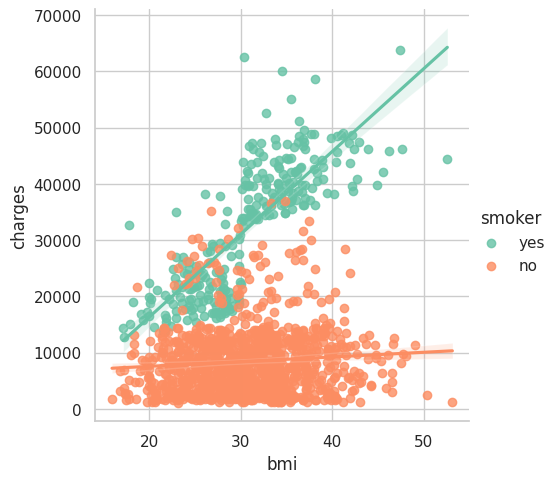

In [56]:
sns.lmplot(x='age', y='charges', hue='smoker', data=data_sin_duplicados, palette='Set1')
sns.lmplot(x='bmi', y='charges', hue='smoker', data=data_sin_duplicados, palette='Set2')

plt.show()


Charges y niños segun personas si fuman o no, las personas que tienen hijos fuman menos

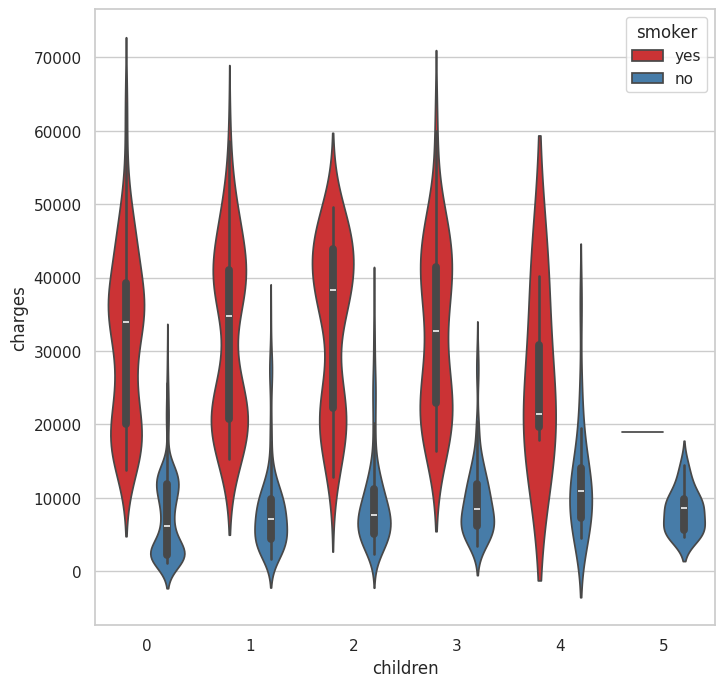

In [57]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.violinplot(x='children', y='charges', hue='smoker', data=data_sin_duplicados, palette='Set1')
plt.show()



*   Fumar tiene un alto impacto en relación a charges, los costos de igual manera aumentan con la edad y el índice de masa corporal




#Convertir variables categoricas en etiquetas


In [58]:
data_sin_duplicados[['sex', 'smoker', 'region']] = data_sin_duplicados[['sex', 'smoker', 'region']].astype('category')
data_sin_duplicados.dtypes

<ipython-input-58-a2e4293b7c4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sin_duplicados[['sex', 'smoker', 'region']] = data_sin_duplicados[['sex', 'smoker', 'region']].astype('category')


age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

#Convertir variables categoricas en numerica

In [59]:
from sklearn.preprocessing import LabelEncoder

# Suponiendo que 'data_sin_duplicados' es tu DataFrame
label_encoder = LabelEncoder()

# Convertir 'sex' a numérico (0 para hombres, 1 para mujeres)
data_sin_duplicados['sex'] = label_encoder.fit_transform(data_sin_duplicados['sex'])

# Convertir 'smoker' a numérico (1 para los que fuman, 0 para los que no)
data_sin_duplicados['smoker'] = label_encoder.fit_transform(data_sin_duplicados['smoker'])

# Mapeo de regiones
mapeo_regiones = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}

# Convertir 'region' a numérico según el mapeo
data_sin_duplicados['region'] = data_sin_duplicados['region'].map(mapeo_regiones)

# Asegurarse de que 'region' sea de tipo entero (int)
data_sin_duplicados['region'] = data_sin_duplicados['region'].astype(int)

# Mostrar DataFrame después de la conversión
print(data_sin_duplicados)


      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       0  16884.92400
1      18    1  33.770         1       0       1   1725.55230
2      28    1  33.000         3       0       1   4449.46200
3      33    1  22.705         0       0       2  21984.47061
4      32    1  28.880         0       0       2   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       2  10600.54830
1334   18    0  31.920         0       0       3   2205.98080
1335   18    0  36.850         0       0       1   1629.83350
1336   21    0  25.800         0       0       0   2007.94500
1337   61    0  29.070         0       1       2  29141.36030

[1337 rows x 7 columns]


<ipython-input-59-2003f7b98dbb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sin_duplicados['sex'] = label_encoder.fit_transform(data_sin_duplicados['sex'])
<ipython-input-59-2003f7b98dbb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sin_duplicados['smoker'] = label_encoder.fit_transform(data_sin_duplicados['smoker'])
<ipython-input-59-2003f7b98dbb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [60]:
print(data_sin_duplicados)
data_sin_duplicados.dtypes

      age  sex     bmi  children  smoker  region      charges
0      19    0  27.900         0       1       0  16884.92400
1      18    1  33.770         1       0       1   1725.55230
2      28    1  33.000         3       0       1   4449.46200
3      33    1  22.705         0       0       2  21984.47061
4      32    1  28.880         0       0       2   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970         3       0       2  10600.54830
1334   18    0  31.920         0       0       3   2205.98080
1335   18    0  36.850         0       0       1   1629.83350
1336   21    0  25.800         0       0       0   2007.94500
1337   61    0  29.070         0       1       2  29141.36030

[1337 rows x 7 columns]


age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

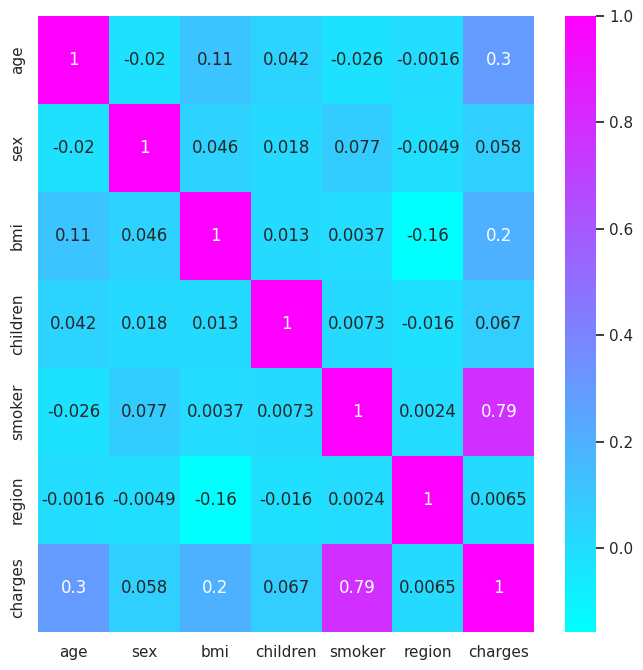

In [61]:
f, ax = plt.subplots(1,1, figsize=(8,8))
ax = sns.heatmap(data_sin_duplicados.corr(), annot=True, cmap='cool')

Se puede ver correlacion bajas en las distintas variables. Sin embargo, en la de fumar se ve que existe una correlacion alta con charges. Es decir a medida que la persona fuma, charges aumenta.

##Regresion Lineal

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x= data_sin_duplicados.drop(['charges'], axis=1)
y = data_sin_duplicados['charges']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
reg_lineal = Lin_reg.fit(x_train, y_train)
print('Intercepto: %.3f' % Lin_reg.intercept_)
print(Lin_reg.coef_)
print('score: %.3f' %Lin_reg.score(x_test,y_test))

Intercepto: -11792.868
[  244.40254189  -203.81680641   308.01805142   495.56546634
 23771.78167483   377.96465113]
score: 0.753


#Metricas

In [63]:
#Haciendo las predicciones en el conjunto de prueba
y_pred_lineal = reg_lineal.predict(x_test)
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_lineal))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_lineal))
print("Root Mean Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_lineal)))

#Coeficiente de determinacion 1 es buena prediccion

print('Coeficiente de determinacion: %.2f' % r2_score(y_test, y_pred_lineal))




Mean Absolute Error: 4400.502490291576
Mean Squared Error: 41607776.51148494
Root Mean Error: 6450.409018929337
Coeficiente de determinacion: 0.75


El resultado es suficientemente bueno, se puede mejorar intentar reduciendo las caracteristicas sin importancia.

#Regresion Ridge

In [64]:
from sklearn.linear_model import Ridge

# Crear una instancia de Ridge
ridge_model = Ridge(alpha=1)

# Entrenar el modelo con los datos de entrenamiento
ridge_model.fit(x_train, y_train)

# Imprimir el intercepto y los coeficientes
print(ridge_model.intercept_)
print('Coeficientes:', ridge_model.coef_)

# Calcular y imprimir el puntaje R^2 en los datos de prueba
print('score:', ridge_model.score(x_test, y_test))


-11757.842799700735
Coeficientes: [  244.2786597   -198.42116783   307.82856068   496.23646713
 23634.11592687   378.03029353]
score: 0.7525662751474318


In [65]:
#Haciendo las predicciones en el conjunto de prueba
y_pred_ridge = ridge_model.predict(x_test)

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_ridge))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_ridge))
print("Root Mean Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))

#Coeficiente de determinacion 1 es buena prediccion

print('Coeficiente de determinacion: %.2f' % r2_score(y_test, y_pred_ridge))


Mean Absolute Error: 4411.409388316828
Mean Squared Error: 41625668.385985
Root Mean Error: 6451.795748935718
Coeficiente de determinacion: 0.75


Si comparamos los dos, podemos ver que los errores son un poco menores en regresion lineal.

##Regresion Lasso


In [66]:
from sklearn.linear_model import Lasso

Lasso = Lasso(alpha=1, fit_intercept=True, precompute=False, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
model_lasso= Lasso.fit(x_train, y_train)

# Imprimir el intercepto y los coeficientes
print(Lasso.intercept_)
print('Coeficientes:', Lasso.coef_)

# Calcular y imprimir el puntaje R^2 en los datos de prueba
print('score:', Lasso.score(x_test, y_test))


-11789.336345999174
Coeficientes: [  244.40120755  -199.50449303   307.9446655    494.86675406
 23765.39624646   377.07400496]
score: 0.7526738508185569


In [67]:
#Haciendo las predicciones en el conjunto de prueba
y_pred_lasso = model_lasso.predict(x_test)

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_lasso))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_lasso))
print("Root Mean Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

#Coeficiente de determinacion 1 es buena prediccion

print('Coeficiente de determinacion: %.2f' % r2_score(y_test, y_pred_lasso))


Mean Absolute Error: 4400.812545480756
Mean Squared Error: 41607570.97741501
Root Mean Error: 6450.393087046325
Coeficiente de determinacion: 0.75


En resumen, según estas métricas, los tres modelos parecen comportarse de manera similar en términos de rendimiento predictivo en este conjunto de datos. Todos tienen valores de MAE, MSE, RMSE y R^2 muy cercanos entre sí.

#Random Forest


In [68]:
from sklearn.ensemble import RandomForestRegressor as rfr

x = data_sin_duplicados.drop(['charges'], axis=1)
y = data_sin_duplicados['charges']

Rfr = rfr(n_estimators=100, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=1, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
model_Rfr = Rfr.fit(x_train, y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data:', metrics.mean_squared_error(x_train_pred, y_train))
print('MSE test data:', metrics.mean_squared_error(x_test_pred, y_test))
print('R2 train data:', metrics.r2_score(y_train, x_train_pred))
print('R2 test data:', metrics.r2_score(y_test, x_test_pred))



MSE train data: 3354535.103076124
MSE test data: 27098696.533498373
R2 train data: 0.9761963722681035
R2 test data: 0.8389183481750304


In [69]:
y_pred_rfr = model_Rfr.predict(x_test)

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_rfr))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_rfr))
print("Root Mean Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfr)))

#Coeficiente de determinacion 1 es buena prediccion

print('Coeficiente de determinacion: %.2f' % r2_score(y_test, y_pred_rfr))



Mean Absolute Error: 2900.0829355874303
Mean Squared Error: 27098696.533498373
Root Mean Error: 5205.640837927485
Coeficiente de determinacion: 0.84


Como estimamos variables importantes de valor

Feature importance ranking


1.smoker(0.629024)
2.bmi(0.206329)
3.age(0.128438)
4.children(0.017414)
5.region(0.013208)
6.sex(0.005588)


<BarContainer object of 6 artists>

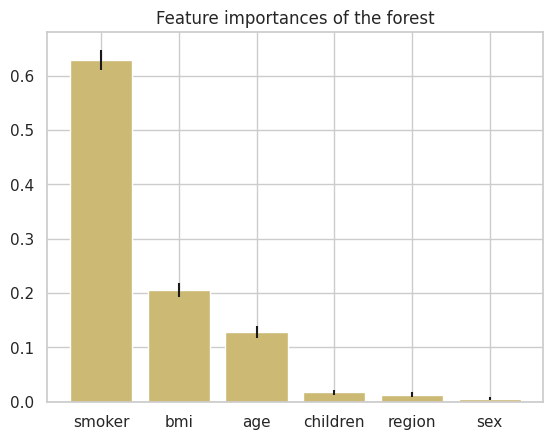

In [70]:
print('Feature importance ranking\n\n')

importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

plt.figure()
plt.title("Feature importances of the forest")
plt.bar(importance_list, importances[indices], color="y", yerr=std[indices], align="center")


Estos resultados indican que el modelo de Random Forest tiene un rendimiento bastante bueno en la predicción en el conjunto de datos de prueba, con un R2 de 0.84. Se puede ver cierto error en las predicciones, como se refleja en el MAE, MSE y RMSE.

Las variables mas importantes en este caso para determinar el costo es smoker, bmi, age.

##XGBOOST

In [71]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Suponiendo que ya tienes definidos x_train, x_test, y_train, y_test

# Crear el modelo de XGBoost con los parámetros específicos
xgb_model = xgb.XGBRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                             criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                             min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                             init=None, random_state=None, max_features=None, alpha=0.9, verbose=0,
                             max_leaf_nodes=None, warm_start=False, validation_fraction=0.1,
                             n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Entrenar el modelo
xgb_model.fit(x_train, y_train)

# Predecir sobre el conjunto de entrenamiento y de prueba
y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)

# Calcular las métricas de evaluación
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Imprimir las métricas
print('MSE train data:', mse_train)
print('MSE test data:', mse_test)
print('R2 train data:', r2_train)
print('R2 test data:', r2_test)


MSE train data: 14082982.633892491
MSE test data: 24949360.07416761
R2 train data: 0.900067799062667
R2 test data: 0.8516945592657981


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:56:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "ccp_alpha", "criterion", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split", "min_weight_fraction_leaf", "tol", "validation_fraction", "verbose", "warm_start" } are not used.

  warnings.warn(smsg, UserWarning)


In [72]:
y_pred_xg = xgb_model.predict(x_test)

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred_xg))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred_xg))
print("Root Mean Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_xg)))

#Coeficiente de determinacion 1 es buena prediccion

print('Coeficiente de determinacion: %.2f' % r2_score(y_test, y_pred_xg))

Mean Absolute Error: 2759.5594960042195
Mean Squared Error: 24949360.07416761
Root Mean Error: 4994.933440414157
Coeficiente de determinacion: 0.85


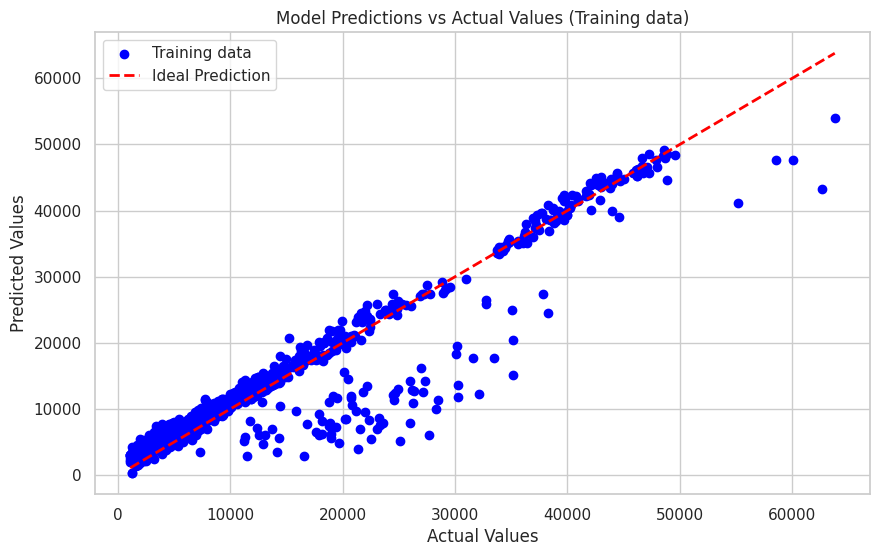

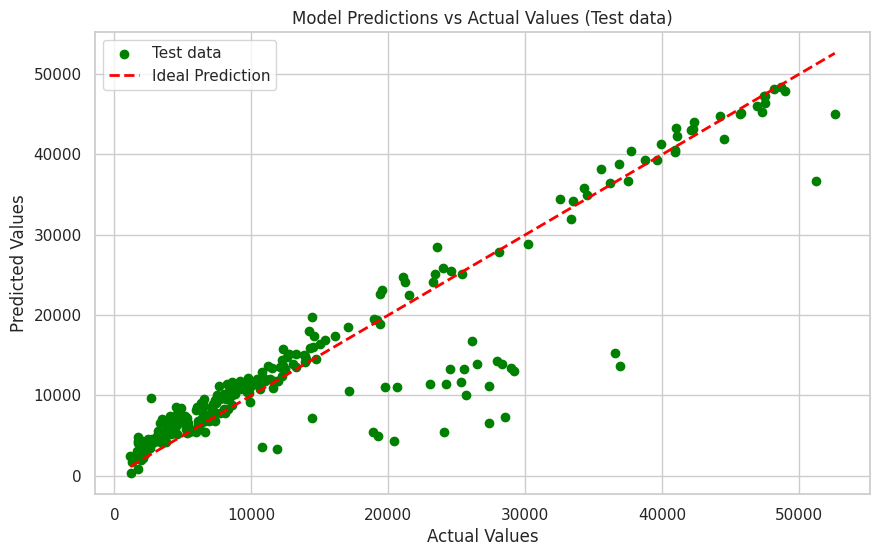

In [73]:
import matplotlib.pyplot as plt

# Graficar las predicciones del modelo vs los datos reales para el conjunto de entrenamiento
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Training data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--', color='red', linewidth=2, label='Ideal Prediction')
plt.title('Model Predictions vs Actual Values (Training data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# Graficar las predicciones del modelo vs los datos reales para el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='green', label='Test data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2, label='Ideal Prediction')
plt.title('Model Predictions vs Actual Values (Test data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


Feature importance ranking


1.smoker(0.898527)
2.bmi(0.048428)
3.age(0.037765)
4.children(0.007276)
5.region(0.007108)
6.sex(0.000895)


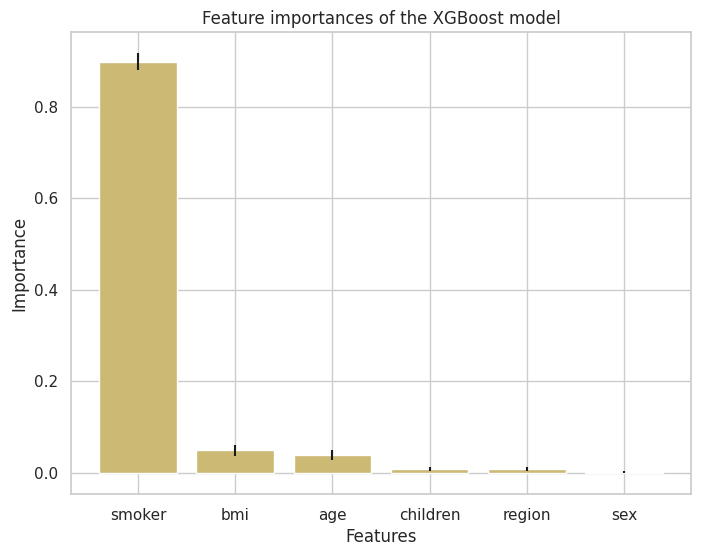

In [74]:
# Obtener la importancia de las variables
importances = xgb_model.feature_importances_


# Ordenar las importancias de las variables de mayor a menor
indices = np.argsort(importances)[::-1]

# Lista de nombres de las variables
variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

# Imprimir la importancia de las variables
print('Feature importance ranking\n\n')
importance_list = []
for f in range(x_train.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Graficar la importancia de las variables
plt.figure(figsize=(8, 6))
plt.title("Feature importances of the XGBoost model")
plt.bar(importance_list, importances[indices], color="y", yerr=std[indices], align="center")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


El modelo de XGBoost ha logrado un buen rendimiento en la predicción del costo de seguro médico, con un R2 de aproximadamente 0.85 en el conjunto de datos de prueba. Además, se ha identificado que la característica más importantes para la predicción es si el individuo es fumador o no, seguida del índice de masa corporal (bmi) y la edad.

##Ensemble


In [75]:
from sklearn.ensemble import VotingRegressor

# Crear el Voting Regressor con los modelos individuales
voting_regressor = VotingRegressor(estimators=[
    ('linear', reg_lineal),
    ('lasso', model_lasso),
    ('ridge', ridge_model),
    ('random_forest', model_Rfr),
    ('xgboost', xgb_model)
])

# Entrenar el Voting Regressor
voting_regressor.fit(x_train, y_train)

# Predicciones del Voting Regressor
ensemble_pred = voting_regressor.predict(x_test)

# Calcular el error cuadrático medio (MSE) para el ensemble
ensemble_mse = mean_squared_error(y_test, ensemble_pred)

print("MSE Ensemble (Voting Regressor):", ensemble_mse)


MSE Ensemble (Voting Regressor): 30790802.00702431


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:56:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "ccp_alpha", "criterion", "loss", "min_impurity_decrease", "min_samples_leaf", "min_samples_split", "min_weight_fraction_leaf", "tol", "validation_fraction", "verbose", "warm_start" } are not used.

  warnings.warn(smsg, UserWarning)


Valores predictivos con valores actuales

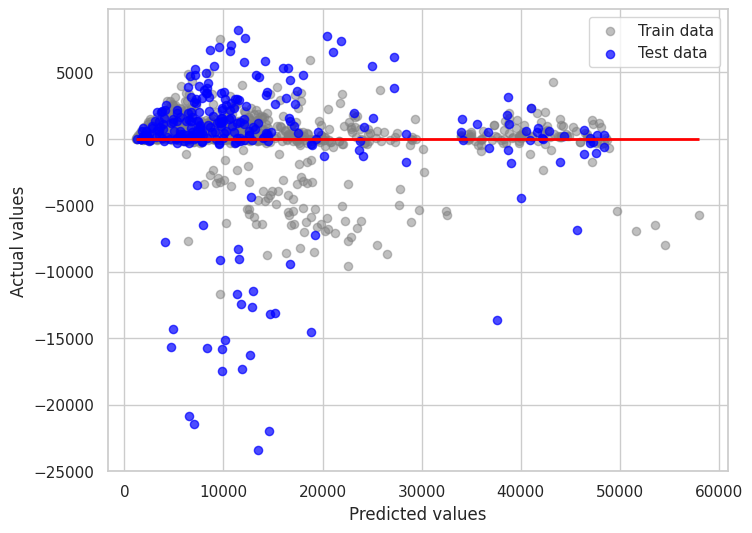

In [76]:
plt.figure(figsize=(8, 6))

plt.scatter(x_train_pred, x_train_pred - y_train, c='gray', marker='o', s=35, alpha=0.5, label='Train data')
plt.scatter(x_test_pred, x_test_pred - y_test, c='blue', marker='o', s=35, alpha=0.7, label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc='upper right')

# Calcula los límites del eje x
xmin = min(min(x_train_pred), min(x_test_pred))
xmax = max(max(x_train_pred), max(x_test_pred))

# Dibuja la línea de regresión roja
plt.hlines(y=0, xmin=xmin, xmax=xmax, lw=2, color='red')

plt.show()


Se compara la relacion entre los valores actuales con los valores predecidos donde se puede observar que estan muy semejantes.

In [77]:
y_test_pred = xgb_model.predict(x_test)

#Comparando los valores actuales con los valores predecidos
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_xg})
df

,Actual,Predicted
1248,1633.96180,2235.123779
610,8547.69130,10427.077148
393,9290.13950,11271.480469
503,32548.34050,34492.140625
198,9644.25250,10457.728516
...,...,...
809,3309.79260,6613.359863
726,6664.68595,7231.766602
938,2304.00220,4343.154297
474,25382.29700,25063.531250


# Conclusiones

El objetivo era a traves de diferentes modelos estimar el costo del seguro dependiendo de las variables.
Al realizar al inicio el analisis exploratorio se pudo observar la relacion que existia entre el costo con fumador, bmi y edad. Por lo que se realizo un grafico en donde se obtuvo que para los fumadores es mas alto el rango de costos. Y en cuanto a bmi, las personas que no fuman se puede observar que el costo es practicamente constante durante los años. Sin embargo, para los fumadores, se puede observar que el indice de masa corporal a menos edad menos bmi y el costo es menor, pero a mayor edad va creciendo significativamente bmi y el costo. Y por ultimo a menor edad menor costo y mayor edad mayor costo.

Posterior, se realizo diferentes modelos, donde se pudo observar que el que mejor modelo que se ajusta es XGBoost con un 0.85% y en cuanto a las metricas de evaluacion utilizadas se podria decir que tambien a diferencia de los otros (MSE y R2). Por lo que se podria decir que en es un buen modelo en términos de ajuste y generalización, pero podría haber un cierto grado de sobreajuste debido a la diferencia entre el rendimiento en los conjuntos de entrenamiento y prueba. Ademas, se observa que las caracteristicas mas importantes en ese modelo toma en cuenta fumador, bmi y age.

